숫자끼리 비교하는 연산과 문자끼리 비교하는 연산 중 왜 문자끼리 비교하는 연산이 상대적으로 불리한지 이유에 대해서 정리해보고 샘플 코드를 구현해서 제출하기

문자(char)끼리 비교
- 대소문자 구분(case-sensitive)
- 맞춤법(spelling)
- 메모리 더 사용
- 비교 연산자를 사용할 때 어떤 값을 비교하고 있는지 보기 어려움
- 비교할 때 rich comparison 사용 (즉, 느림)


숫자(number)끼리 비교
- 메모리 덜 사용
- 비교 연산자를 사용할 때 어떤 값을 비교하고 있는지 보기 쉬움
- 비교할 때 direct comparison 사용 (즉, 빠름)

---

## Prerequisite - string은 어떤 과정을 거쳐서 비교되는가?

- 파이썬에서 string을 바교할 때 string에 들어 있는 문자별(letter-by-letter)로 비교가 되는 것이다.
- 컴퓨터는 각 문자를 읽을 때 먼저 숫자 코드 또는 이진수(binary: 0, 1)로 전환하고 이진수 값을 서로 비교하고 나서 이진수 값을 다시 문자로 표현하고 결과를 알려준다.
- 문자 to 이진수로 표현하는 방식은 encoding, 다시 이진수 to 문자로 표현하는 방식은 decoding이라고 부른다.
    - 주로 사용되는 encoding 방식은 ASCII, Unicode이며, encoding 하는 방식에 따라 문자의 숫자코드가 달라진다.
- 문자마다 숫자 코드가 다르기 때문에 string을 비교할 때 기본적으로 대소문자를 구분하고 문자의 순서 또는 맞춤법도 고려하여 비교한다.\\

ref. https://favtutor.com/blogs/compare-strings-python

# 대소문자 구분 (case-sensitive comparison)

- `==` 연산자 또는 `__eq__` rich comparison 함수를 통해 case-sensitive한 string 비교를 할 수 있다.
- 또는, `is` 연산자를 통해 두 string의 내용 뿐만 아니라 서로 유사한 객체인지 확인하여 비교할 수 있다.

In [18]:
string1 = "Rock"
string2 = "rock"

print(string1 == string2)
print(string1.__eq__(string2))
print(string1 is string2)

False
False
False


# 대소문자 구분 Workaround
- casefold() or lower(), upper() 함수를 사용해 입력된 문자 또는 문자열을 소문자/대문자로 변경한 후 문자끼리 대소문자 구분에 대한 걱정 없이 비교할 수 있다.

In [19]:
string1 = "Rock"
string2 = "rock"

print(string1.lower() == string2.lower())
print(string1.upper() == string2.upper())
print(string1.lower() is string2.lower())
print(string1.upper() is string2.upper())

True
True
False
False


#### NOTE. 'is' 와 '==' 의 차이

- `is` : 같은 객체이면 True를 return함
- `==` : 같은 값이면 True를 return함

# 사용자 입력이 복잡해짐
  - 사용자가 입력한 값 또는 내용을 무엇인가랑 비교할 때
    문자의 경우에는 대소문자 구분과 맞춤법 때문에 input이 제대로 인식이 안 될 수 있다. 이 때문에 해결방식이나 workaround 등을 따로 사용해야 한다.

In [39]:
# Sample Rock Paper Scissors Game

choices = ['rock', 'paper', 'scissors']

choice = input('Rock, Paper, Scissors? ')

print("Your input: ", choice)

if choice == choices[0] or choice == choices[1] or choice == choices[2]:
    print("You picked", choice)
else:
    print("Invalid input.")    

# 만약 'ROCK'이라고 입력하면 잘못된 입력으로 인식됨

Your input:  ROCK
Invalid input.


#### 대문자 입력 예시
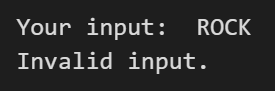
#### 소문자 입력 예시
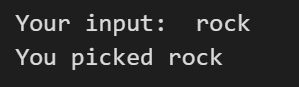

# 사용자 입력 Workaround

- 대소문자를 구분할 수 없이 입력된 문자열의 문자를 모두 소문자로 변경하고 나서 비교를 한다.

In [41]:
# Sample Rock Paper Scissors Game

choices = ['rock', 'paper', 'scissors']

choice = input('Rock, Paper, Scissors? ')

print("Your input:", choice)

print(choice.lower())

if choice.lower() in choices:
    print("You picked", choice)
else:
    print("Invalid input")

# 만약 'ROCK'이라고 입력하면 잘못된 입력으로 인식됨

Your input: RoCk
rock
You picked RoCk


# 맞춤법
- 문자열을 서로 비교할 경우 맞춤법이 틀리면 서로 아예 다른 문자열로 인식된다.

In [22]:
string1 = "nice"
string2 = "nece"

print(string1 is string2)
print(string1 == string2)

False
False


# 변수의 메모리 사용
- 문자는 숫자보다 CPU와 메모리를 더 사용한다.

In [23]:
import sys

print("Size of char:", sys.getsizeof('a'))
print("Size of int:", sys.getsizeof(1))

Size of char: 50
Size of int: 28


# 비교 연산자와 같이 사용
- 숫자의 경우는 "`>, <, <=, >=`" 와 같은 비교 연산자를 통해 비교하면 써도 무엇을 비교하는지 바로 알 수가 있다.
- 문자의 경우는 비교 연산자를 통해 비교하면 보기만으로 무슨 연산을 하는지 이해하기가 어렵다.

## 문자 또는 문자열과 비교 연산자

In [24]:
print('a' < 'b')
print("abcd" < "abce")
print('0' < '1')

True
True
True


- 문자를 비교 연산자로 비교하면 각 문자의 ASCII 값에 따라 비교한다.
         e.g. 'a' : 97, 'b' : 98  
              '0' : 48, '1' : 49

- 즉, 문자나 문자열도 각 문자에 해당하는 숫자(ASCII) 값에 따라 비교한다.

## 숫자와 비교 연산자

In [25]:
print(1 < 2)
# 1이 2보다 작은지 확인하는 코드

True


# Supplement - rich comparison vs. direct comparison

    "So string comparison is slower because it has to use the
    complicated "rich comparison" infrastructure, whereas integer
     comparison is more direct."
  ref. In practice, why compare integer is better than compare string?<br>
  https://stackoverflow.com/questions/14400018/in-practice-why-compare-integer-is-better-than-compare-string


#### *more on rich comparison operators*

- Unravelling rich comparison operators. <br>
https://snarky.ca/unravelling-rich-comparison-operators/
- Comparison operators vs “rich comparison” methods in Python. <br>
https://stackoverflow.com/questions/47797346/comparison-operators-vs-rich-comparison-methods-in-python

# 기타 참고자료

- How to Compare Strings in Python. <br>
https://www.altcademy.com/blog/how-to-compare-strings-in-python/
- [Python] 문자열 비교하기. <br>
https://cheris8.github.io/python/PY-Compare-String/#:~:text=%EB%AC%B8%EC%9E%90%EC%97%B4%EC%9D%B4%20%EC%99%84%EC%A0%84%ED%95%98%EA%B2%8C%20%EC%9D%BC%EC%B9%98,%ED%95%98%EB%A9%B4%20False%20%EB%A5%BC%20%EB%B0%98%ED%99%98%ED%95%A9%EB%8B%88%EB%8B%A4


